In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("WELLCOME_APCspend2013_forThinkful.csv", encoding="latin")
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [22]:
df["Journal title"].value_counts()

PLoS One                                                               92
PLoS ONE                                                               62
Journal of Biological Chemistry                                        48
Nucleic Acids Research                                                 21
Proceedings of the National Academy of Sciences                        19
Human Molecular Genetics                                               18
PLoS Neglected Tropical Diseases                                       18
Nature Communications                                                  17
PLoS Genetics                                                          15
PLoS Pathogens                                                         15
Neuroimage                                                             15
PLOS ONE                                                               14
BMC Public Health                                                      14
NeuroImage                            

In [23]:
len(df["Journal title"].unique())

985

In [24]:
# Low hanging fruit: remove white space, convert to lower case, and remove special characters
df["Journal title"] = df["Journal title"].str.strip()
df["Journal title"] = df["Journal title"].str.lower()
df["Journal title"] = df["Journal title"].str.replace("[!@#$%^&*()?/.,;:]+", "")
len(df["Journal title"].unique())

891

In [40]:
df["Journal title"].value_counts()

plos one                                                  190
journal of biological chemistry                            53
neuroimage                                                 29
nucleic acids research                                     26
plos pathogens                                             24
plos genetics                                              24
proceedings of the national academy of sciences            22
plos neglected tropical diseases                           20
nature communications                                      19
human molecular genetics                                   19
movement disorders                                         15
brain                                                      14
bmc public health                                          14
journal of neuroscience                                    13
biochemical journal                                        12
developmental cell                                         12
journal 

In [41]:
df["COST (£) charged to Wellcome (inc VAT when charged)"].head()

0       £0.00
1    £2381.04
2     £642.56
3     £669.64
4     £685.88
Name: COST (£) charged to Wellcome (inc VAT when charged), dtype: object

In [65]:
# Remove any non-digit characters from COST data and convert to float
df["Cost"] = df["COST (£) charged to Wellcome (inc VAT when charged)"].str.lower().str.replace("[$£]+", "")
df["Cost"] = df["Cost"].apply(lambda x: float(x))
df["Cost"] = df[df["Cost"] < 10000]["Cost"]
df["Cost"].head()

0       0.00
1    2381.04
2     642.56
3     669.64
4     685.88
Name: Cost, dtype: float64

In [66]:
df["Cost"].describe()

count    2077.000000
mean     1822.055908
std       767.698554
min         0.000000
25%      1268.700000
50%      1851.290000
75%      2302.130000
max      6000.000000
Name: Cost, dtype: float64

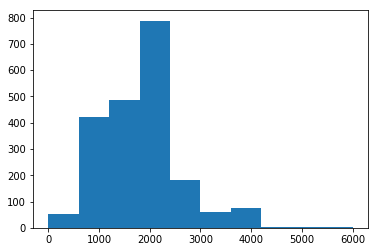

In [67]:
plt.hist(df["Cost"].dropna())
plt.show()

## Determine the five most common journals and the total articles for each

In [86]:
top_five = df["Journal title"].value_counts().head(5)
top_five

plos one                           190
journal of biological chemistry     53
neuroimage                          29
nucleic acids research              26
plos pathogens                      24
Name: Journal title, dtype: int64

## Calculate the mean, median, and standard deviation of the open-access cost per article for each journal 

In [96]:
summary_df = pd.DataFrame(index = top_five.index, columns=["Mean", "Median", "Std"])
for i in range(len(top_five.index)):
    summary_df.loc[top_five.index[i]]["Mean"] = df[df["Journal title"] == top_five.index[i]]["Cost"].mean()
    summary_df.loc[top_five.index[i]]["Median"] = df[df["Journal title"] == top_five.index[i]]["Cost"].median()
    summary_df.loc[top_five.index[i]]["Std"] = df[df["Journal title"] == top_five.index[i]]["Cost"].std()
summary_df

,Mean,Median,Std
plos one,934.656,896.975,201.848
journal of biological chemistry,1423.59,1301.14,411.954
neuroimage,2215.17,2326.43,266.654
nucleic acids research,1149,852,442.94
plos pathogens,1572.87,1600.25,161.781
